<font size="5"><p style="text-align: center;">**Exercice Immigration**</font></p> 

__OBJECTIFS:__
- Importation library
- Manipulation avec Pandas
- Plotting avec pandas ou Matplotlib

The Dataset: Immigration to Canada from 1980 to 2013

United Nations : International migration flows to and from selected countries - The 2015 revision.

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

# Importation libraires

In [1]:
# Importation librairies
import numpy as np  # 
import pandas as pd # 
import matplotlib.pyplot as plt

# Importation fichier

In [2]:
# Lien du fichier
path=r"C:\Users\alder\Documents\DataVisualisation\Dataset\Canada.xlsx"
xl = pd.ExcelFile(path)

# Afficher le nom des sheets
xl.sheet_names  

['Regions by Citizenship', 'Canada by Citizenship']

In [3]:
# Importation du fichier excel
df = pd.read_excel(
    path,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    , usecols="A:AQ")

# Affichage
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [4]:
# Dimension
display(df.shape)
# DES NA ?
df.isnull().sum()
# Info
df.info(verbose=False)

(195, 43)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


# NETTOYAGE avec pandas

### SUPPRIMER DES COLONNES

In [5]:
# SUPPRESSION  axis=0 represente rows (default) et axis=1 represente columns.
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


### RENOMMER LES COLONNES

In [6]:
# 1er manière
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# 2e manière moins fun - renommer l'ensemble
# df.columns # Copie la liste et change celle que l'on désire
# df.columns = ['Name','Age','Roll_no']

### AJOUT DE COLONNE
     axis=0 represent rows (default) et axis=1 represent columns.

In [9]:
df['Total'] = df.sum(axis=1)
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,31398


### INITIALISATION des INDEX

In [10]:
df.set_index('Country', inplace=True)

# QUESTIONS

### _ Line Plot Haiti
__Question 1: Tracez un line Plot de l'immigration en provenance d'Haïti en utilisant df.plot().__

Remarquez comment le nombre d'immigrants d'Haïti a augmenté depuis 2010, le Canada a accepté des réfugiés d'Haïti en raison du tremblement de terre.

Annotez ce pic dans le tracé en utilisant la méthode plt.text(). 

In [11]:
# SELECTION DES LIGNES PERTINENTES
years = list(range(1980, 2014))
haiti = df.loc['Haiti', years]
haiti.head(2)

1980    1666
1981    3692
Name: Haiti, dtype: object

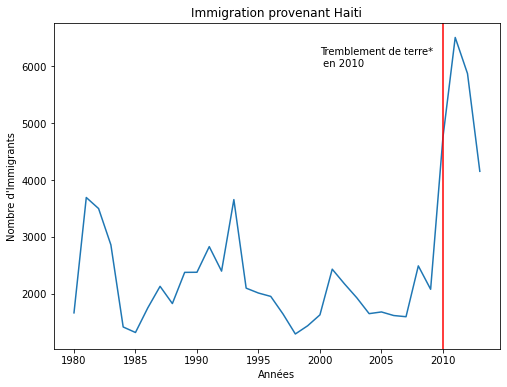

In [289]:
# CREATION DE GRAPHIQUE
haiti.plot(kind='line', figsize=(8,6))

plt.title('Immigration provenant Haiti')
plt.ylabel("Nombre d'Immigrants")
plt.xlabel('Années')

plt.text(2000, 6000, 'Tremblement de terre* \n en 2010') # ajout d'une note
plt.axvline(2010, color='red') # ajout du ligne de référence
plt.show() 

### _ Line PLot Inde et Chine
__Question 2: Comparez avec un line plot le nombre d'immigrants en provenance d'Inde et de Chine de 1980 à 2013.__


In [13]:
# SELECTION DES LIGNES PERTINENTES
df_CI = df.loc[['India', 'China'], years]
df_CI = df_CI.transpose()
df_CI.head(2)

Country,India,China
1980,8880,5123
1981,8670,6682


<AxesSubplot:>

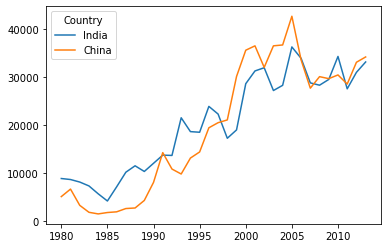

In [14]:
# CREATION DE GRAPHIQUE
df_CI.plot(kind='line')

### _ Line Plot Top 5 pays
__Question 3: Comparez l'évolution  des 5 pays qui ont le plus contribué à l'immigration au Canada avec un line plot.__ 

In [15]:
# SELECTION DES 5 PREMIERS
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top5 = df.head(5)

In [16]:
# TRANSPOSE
df_top5 = df_top5[years].transpose() 
df_top5.head(2)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972


In [18]:
# RENAME COLONNE
df_top5.rename(columns={"United Kingdom of Great Britain and Northern Ireland": "United Kingdom"}, inplace=True)

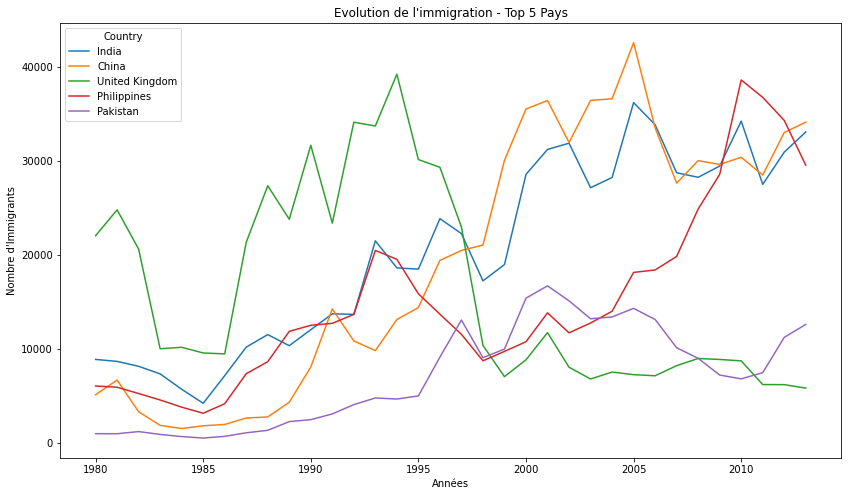

In [19]:
# CREATION GRAPHIQUE
df_top5.plot(kind='line', figsize=(14, 8)) 
plt.title("Evolution de l'immigration - Top 5 Pays")
plt.ylabel("Nombre d'Immigrants")
plt.xlabel('Années')
# plt.legend(['label1', 'label2', 'label3','label4','label5']) si ne renomme pas les colonnes
plt.show()

### _ Top 5 pays Arae Plot
__Question 4: Comparez l'évolution des 5 pays qui ont le plus contribué à l'immigration au Canada avec un Arae plot unstacked et avec une transparence alpha de 0.25__

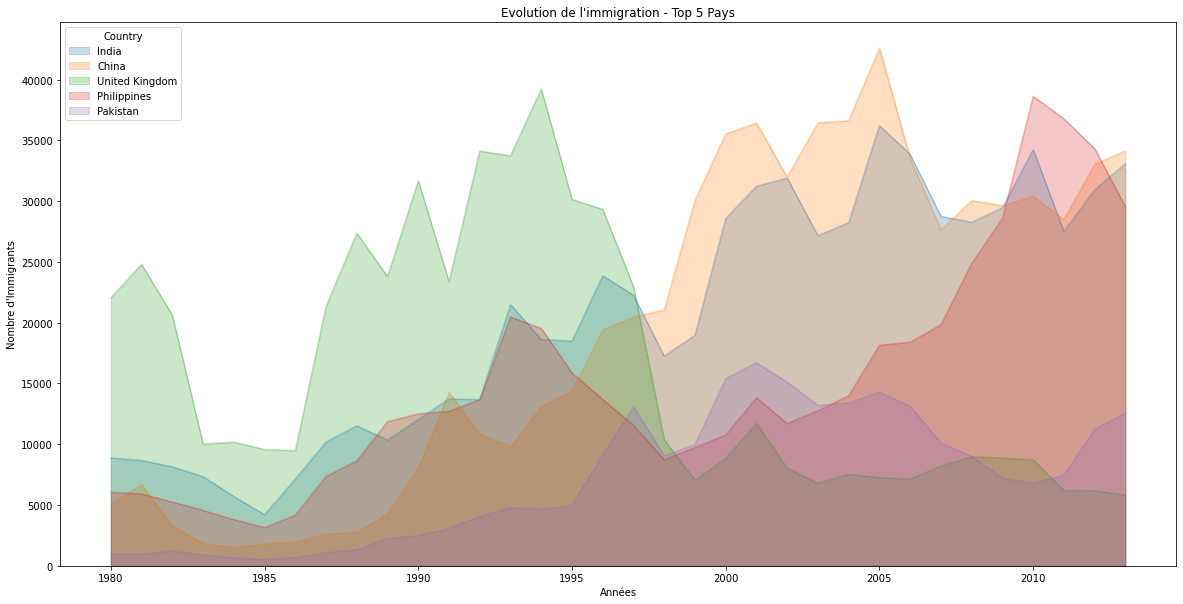

In [20]:
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10),
             alpha=0.25)  

plt.title("Evolution de l'immigration - Top 5 Pays")
plt.ylabel("Nombre d'Immigrants")
plt.xlabel('Années')

plt.show()

### _ Iceland Bar plot et Line Plot
__Question 5: Comparez le nombre d'immigrants islandais (pays = 'Iceland') au Canada de 1980 à 2013. Et ajouter une annotation avec plt.annotate() disant 2008 - 2011  crise financière__

In [21]:
df_iceland = df.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

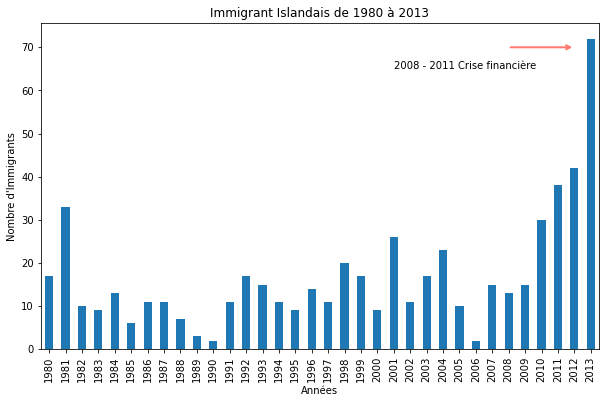

In [27]:
# CREATION GRAPHIQUE BAR PLOT
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.ylabel("Nombre d'Immigrants")
plt.xlabel('Années')
plt.title('Immigrant Islandais de 1980 à 2013') 
# Annotate arrow
plt.annotate('',  
             xy=(32, 70),  # (Annee 2012 , nbre 70)
             xytext=(28, 70),  # (Annee 2008 , nbre 70)
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#FF796C', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Crise financière',  
             xy=(21, 65),  # (Année 2008 , Nombre 65)
             )
plt.show()

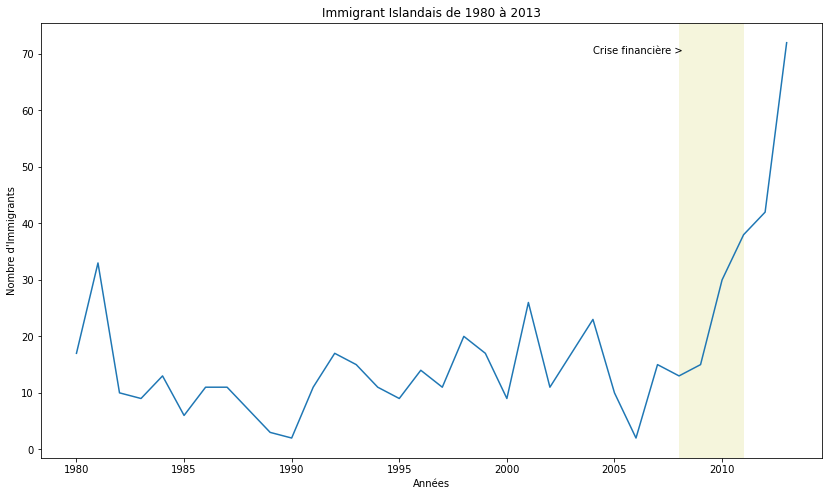

In [303]:
# CREATION GRAPHIQUE LINE PLOT
df_iceland.plot(kind='line', figsize=(14, 8)) 
plt.ylabel("Nombre d'Immigrants")
plt.xlabel('Années')
plt.title('Immigrant Islandais de 1980 à 2013')
plt.axvspan(2008, 2011, facecolor='#F5F5DC')
plt.text(2004, 70, 'Crise financière >') # ajout d'une note
plt.show()

### _ Top 15 pays Bar plot
__Question 6: Créez un Bar plot horizontales montrant le nombre total d'immigrants au Canada en provenance des 15 principaux pays, pour la période 1980-2013.__

In [35]:
# SELECTION DES LIGNES PERTINENTES
df.sort_values(by='Total', ascending=True, inplace=True)

# Obtenir top 15
df_top15 = df['Total'].tail(15)
df_top15.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)

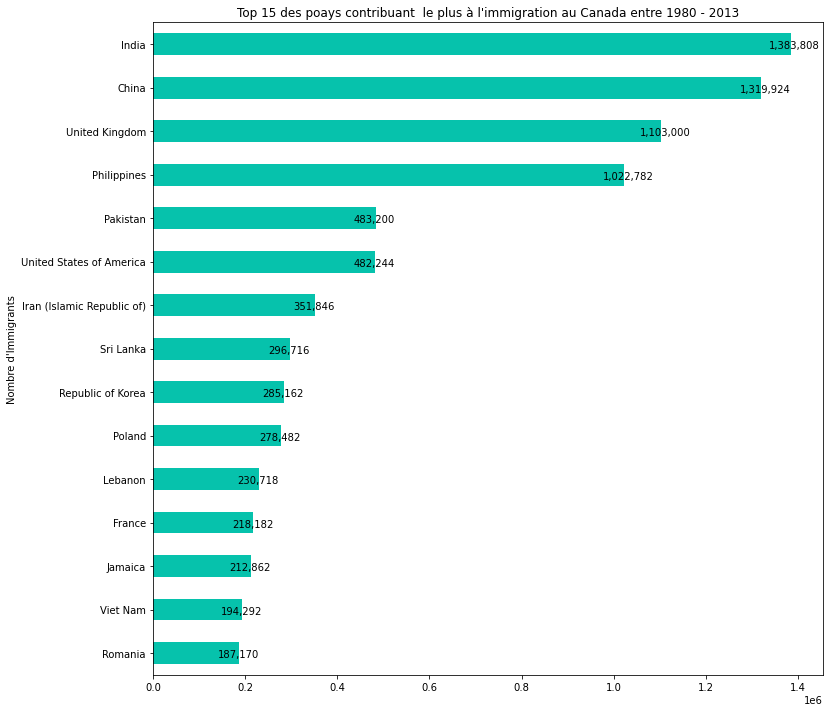

In [40]:
# CREATION GRAPHIQUE
df_top15.plot(kind='barh', figsize=(12, 12), color='#06C2AC')
plt.ylabel("Nombre d'Immigrants")
plt.title("Top 15 des poays contribuant  le plus à l'immigration au Canada entre 1980 - 2013")

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='black')
#plt.xlim(0,1500000)

plt.show()

### _ Continent Pie plot
__Question 7: Comparez le nombre total d'immigration pour chaque continent au moyen d'un Pie plot__

In [41]:
# SELECTION DES DONNEES PERTINENTES
df_continents = df.groupby('Continent', axis=0).sum()
df_continents.sort_values(by='Total', ascending=False, inplace=True)
df_continents.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894


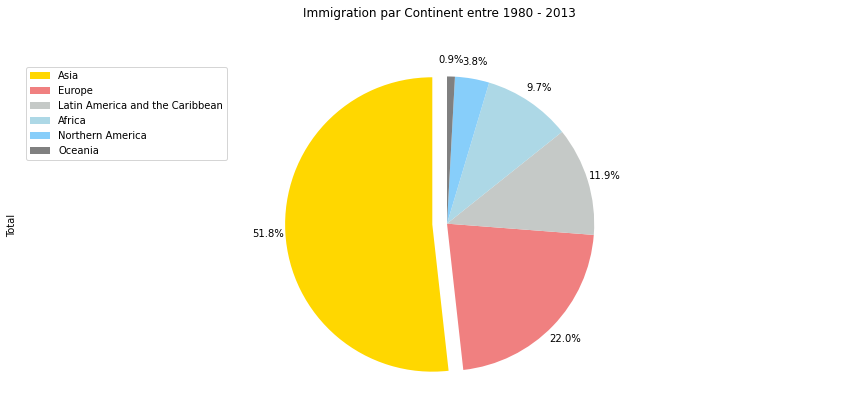

In [307]:
# CREATION GRAPHIQUE
colors_list = ['gold', 'lightcoral', '#C5C9C7', 'lightblue', 'lightskyblue', '#808080']
explode_list = [0.1, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            #shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # pisition du ratio par rapport au centre 
                            colors=colors_list,  # Couleur
                            explode=explode_list # 'explode' 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration par Continent entre 1980 - 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### _ France-Belgique Boxplot
__Question 8: Comparez la distribution des immigrants Francais et Belges au Canada au moyen d'un Boxplot__

In [308]:
# SELECTION DES DONNEES 
df_BEFR= df.loc[['France', 'Belgium'], years].transpose()
df_BEFR.head()

Country,France,Belgium
1980,1729,511
1981,2027,540
1982,2219,519
1983,1490,297
1984,1169,183


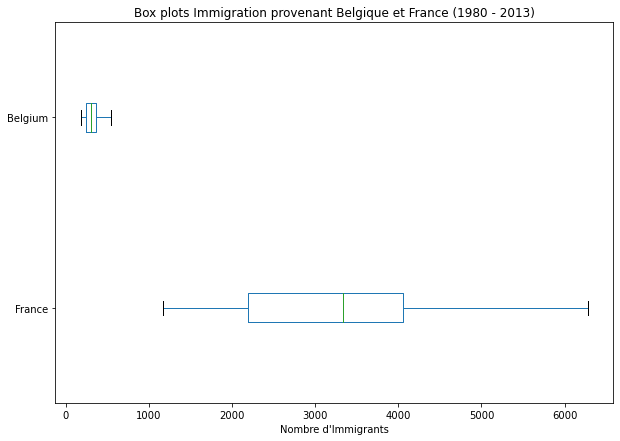

In [309]:
# CREATION GRAPHIQUE
df_BEFR.plot(kind='box', figsize=(10, 7), vert=False)

plt.title('Box plots Immigration provenant Belgique et France (1980 - 2013)')
plt.xlabel("Nombre d'Immigrants")

plt.show()

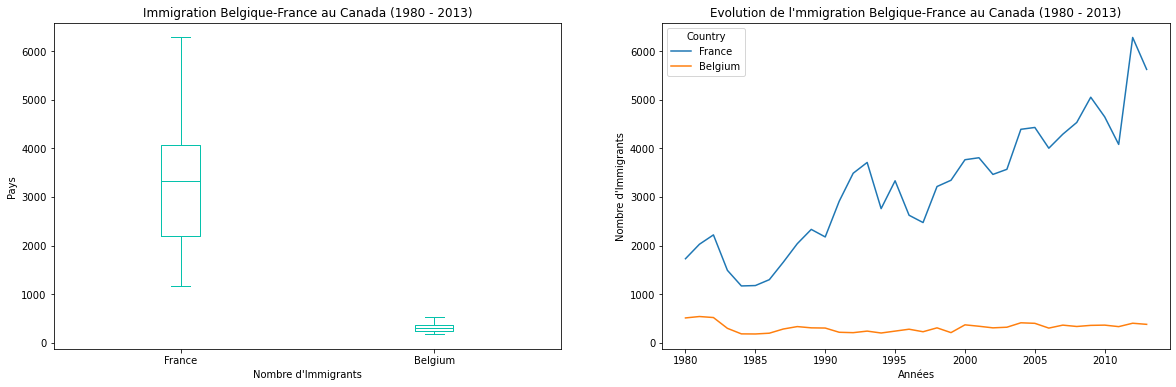

In [310]:
# CREATION SUBPLOT
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) #  (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) #  (1 row, 2 columns, second plot)

# Subplot 1: Box plot
df_BEFR.plot(kind='box', color='#06C2AC', vert=True, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Immigration Belgique-France au Canada (1980 - 2013)')
ax0.set_xlabel("Nombre d'Immigrants")
ax0.set_ylabel('Pays')

# Subplot 2: Line plot
df_BEFR.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ("Evolution de l'mmigration Belgique-France au Canada (1980 - 2013)")
ax1.set_ylabel("Nombre d'Immigrants")
ax1.set_xlabel('Années')

plt.show()

### _ Regression linéaire scatter plot
__Question 9: Visualisez l'evolution de l'immigration totale au Canada (tous pays confondus) pour les années 1980 à 2013 au moyen d'un scatter plot. Ajouter également une droite de régression linéaire sur votre graphique__ 

In [338]:
# SELECTION DES LIGNES PERTINENTES
df.head(2)
df.columns
df2=df[[ 1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,     'Total']].reset_index()
df2.head(2)

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Palau,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [339]:
# 1e méthode
df2=df2.melt(id_vars=['Country'],value_vars=[ 1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013]  ,  var_name="year", value_name="total").groupby("year")["total"].sum().reset_index()
df2=pd.DataFrame(df2)
df2.head(2)

,year,total
0,1980,99137
1,1981,110563


In [340]:
# 2e méthode
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head(2)

,year,total
0,1980,99137
1,1981,110563


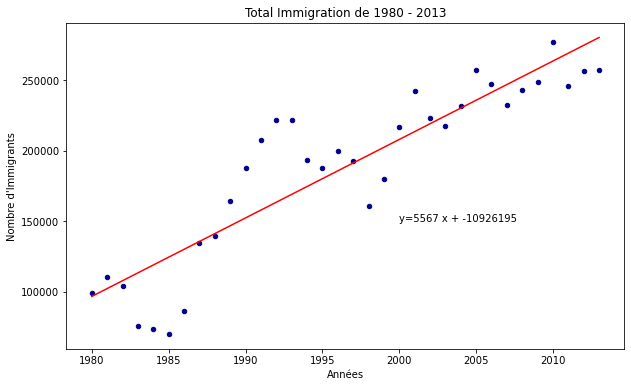

In [229]:
# CREATION GRAPHIQUE
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration de 1980 - 2013')
plt.xlabel('Années')
plt.ylabel("Nombre d'Immigrants")

# Droite reg
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# 
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

plt.show()

### _ Map
__Question10: Réaliser une carte permettant de mieux distinguer l'origine et le nombre de immigrants toutes années confondue__ 

In [42]:
df_map=df.reset_index()
df_map=df_map[["Country", "Continent","Total"]]
df_map=df_map.sort_values(by="Total", ascending=False)

In [43]:
path="C:/Users/alder/Documents/DataVisualisation/Dataset/data_country.csv"
df2=pd.read_csv(path)
df2.head(2)
df3=pd.merge(df_map,df2, left_on=["Country"], right_on="Country")
df3.head()

,Country,Continent,Total,Country_2code,Country_3code,Capital,Region,Subregion,Population,Lat,long,Area
0,India,Asia,1383808,IN,IND,New Delhi,Asia,Southern Asia,1295210000,20.0,77.0,3287590.0
1,China,Asia,1319924,CN,CHN,Beijing,Asia,Eastern Asia,1377422166,35.0,105.0,9640011.0
2,Philippines,Asia,1022782,PH,PHL,Manila,Asia,South-Eastern Asia,103279800,13.0,122.0,342353.0
3,Pakistan,Asia,483200,PK,PAK,Islamabad,Asia,Southern Asia,194125062,30.0,70.0,881912.0
4,United States of America,Northern America,482244,US,USA,"Washington, D.C.",Americas,Northern America,323947000,38.0,-97.0,9629091.0


In [45]:
import plotly.express as px
fig=px.scatter_geo(df3, locations="Country_3code", color="Continent",
                  hover_name="Country",
                  size="Total"
                  
                  )
fig.show()

In [271]:
px.choropleth(df3, locations="Country_3code", hover_name="Country", color="Total",color_continuous_scale="Viridis", height=700)

### _ Histo
__Question 11: Réalisez un histogramme montrant le nombre d'immigrant par nombre de pays pour la dernière année enregistré__

In [71]:
# np.histogram retourne 2 valeurs 
count, bin_edges = np.histogram(df[2013]) #, bins=nombre

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[164  14   9   2   1   0   1   1   0   0   0   0   0   0   0   0   0   1
   0   2]
[    0.    1706.45  3412.9   5119.35  6825.8   8532.25 10238.7  11945.15
 13651.6  15358.05 17064.5  18770.95 20477.4  22183.85 23890.3  25596.75
 27303.2  29009.65 30716.1  32422.55 34129.  ]


Par défaut, la méthode « histogramme » divise l'ensemble de données en 10 groupes. 
* 178 pays ont contribué entre 0 et 3412,9 immigrants
* 11 pays ont contribué entre 3412,9 à 6825,8 immigrants
* 1 pays a contribué entre 6285,8 à 10238,7 immigrants, et ainsi de suite.


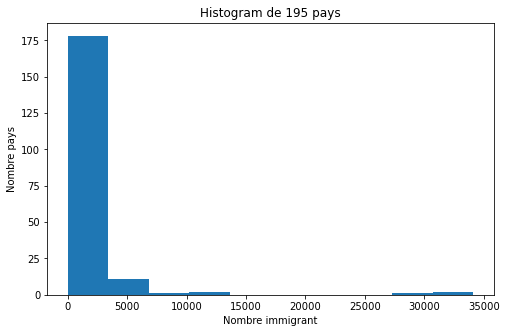

In [273]:
# count, bin_edges = np.histogram(df[2013])
df[2013].plot(kind='hist', figsize=(8, 5), bins=10) #,bins=nombre - 10 par defaut

plt.title('Histogram de 195 pays')  
plt.ylabel('Nombre pays')  
plt.xlabel('Nombre immigrant') 

plt.show()

__BONUS: faire un word cloud avec le nom de pays contribuant le plus à l'immigration.__

    Source: https://github.com/amueller/word_cloud/
    

<details><summary>Double clique pour connaitre la source de l'exercice </summary>

```python
Sources: Nation Unis et IBM Corporation
```